Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors as mcolors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
boroughs=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Boroughs_london.csv',index_col=0)

In [3]:
boroughs

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude
0,E09000001,City of London,Inner London,8800,5326,51.5155,-0.0922
1,E09000002,Barking and Dagenham,Outer London,209000,78188,51.5607,0.1557
2,E09000003,Barnet,Outer London,389600,151423,51.6252,-0.1517
3,E09000004,Bexley,Outer London,244300,97736,51.4549,0.1505
4,E09000005,Brent,Outer London,332100,121048,51.5588,-0.2817
5,E09000006,Bromley,Outer London,327900,140602,51.4039,0.0198
6,E09000007,Camden,Inner London,242500,107654,51.5290,-0.1255
7,E09000008,Croydon,Outer London,386500,159010,51.3714,-0.0977
8,E09000009,Ealing,Outer London,351600,132663,51.5130,-0.3089
9,E09000010,Enfield,Outer London,333000,130328,51.6538,-0.0799


Read file with List of neighbourhoods

In [4]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [5]:
neighbourhoods

,Borough,Neighbourhood,Latitude,Longitude
0,Barking and Dagenham,Rush Green,51.565500,0.176000
1,Barking and Dagenham,Marks Gate,51.586369,0.134848
2,Barking and Dagenham,Becontree Heath,51.563595,0.152614
3,Barking and Dagenham,Becontree,51.548700,0.142700
4,Barking and Dagenham,Barking,51.540000,0.080000
...,...,...,...,...
563,Westminster,Millbank,51.491500,-0.129500
564,Westminster,Maida Vale,51.527400,-0.189900
565,Westminster,St James's,51.508500,-0.133000
566,Westminster,Covent Garden,51.512874,-0.122544


In [6]:
neighbourhoods.shape

(563, 4)

In [7]:

London_neig_venues=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_borough_neig_venues.csv",index_col=0)


Let's check how many venues were returned for each neighborhood

In [8]:
London_neig_venues.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Venue Category
0,Barking and Dagenham,Rush Green,51.565500,0.176000,Co-op Food,51.565820,0.175966,Grocery Store,shops
1,Barking and Dagenham,Rush Green,51.565500,0.176000,BP,51.565801,0.176862,Gas Station,shops
2,Barking and Dagenham,Rush Green,51.565500,0.176000,Costa Coffee,51.568029,0.180212,Coffee Shop,food
3,Barking and Dagenham,Rush Green,51.565500,0.176000,Lynne Davis Wedding and Events,51.565908,0.178294,Flower Shop,shops
4,Barking and Dagenham,Rush Green,51.565500,0.176000,Go Shop,51.568454,0.180030,Convenience Store,shops
5,Barking and Dagenham,Marks Gate,51.586369,0.134848,Co-op Food,51.584313,0.135648,Grocery Store,shops
6,Barking and Dagenham,Marks Gate,51.586369,0.134848,The Crooked Billet,51.587311,0.130429,Dive Bar,nightlife
7,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Iceland,51.560578,0.147685,Grocery Store,shops
8,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Shell,51.560415,0.148364,Gas Station,shops
9,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center,building


In [9]:
London_neig_venues.groupby('Neighbourhood').count()

,Borough,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Venue Category
Neighbourhood,,,,,,,,
Abbey Wood,4,4,4,4,4,4,4,4
Acton,20,20,20,20,20,20,20,20
Addington,4,4,4,4,4,4,4,4
Addiscombe,12,12,12,12,12,12,12,12
Albany Park,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
Woolwich,28,28,28,28,28,28,28,28
Worcester Park,18,18,18,18,18,18,18,18
Wormwood Scrubs,5,5,5,5,5,5,5,5


DERIVED CATEBORIES FROM FOURSQUARE ['Venue Category']

Let's find out how many unique categories can be curated from all the returned venues

In [10]:
print('There are {} uniques categories.'.format(len(London_neig_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [11]:
print(London_neig_venues['Venue Category'].unique())

['shops' 'food' 'nightlife' 'building' 'parks_outdoors' 'travel'
 'arts_entertainment' 'education' 'event']


Analize each neighbourhood

In [12]:
# one hot encoding
London_neig_onehot = pd.get_dummies(London_neig_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_neig_onehot['Neighbourhood'] = London_neig_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [London_neig_onehot.columns[-1]] + list(London_neig_onehot.columns[:-1])
London_neig_onehot = London_neig_onehot[fixed_columns]

London_neig_onehot.head()


,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Rush Green,0,0,0,0,0,0,0,1,0
1,Rush Green,0,0,0,0,0,0,0,1,0
2,Rush Green,0,0,0,0,1,0,0,0,0
3,Rush Green,0,0,0,0,0,0,0,1,0
4,Rush Green,0,0,0,0,0,0,0,1,0


Examine the dataframe size

In [13]:
London_neig_onehot.shape

(12462, 10)

USING FREQUENCY MEAN OF CATEGORY OCCURRENCE

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [14]:
London_neig_grouped_mean = London_neig_onehot.groupby('Neighbourhood').mean().reset_index()
London_neig_grouped_mean


,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
1,Acton,0.0,0.0,0.0,0.0,0.200000,0.000000,0.100000,0.300000,0.400000
2,Addington,0.0,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.250000,0.500000
3,Addiscombe,0.0,0.0,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
4,Albany Park,0.0,0.0,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...
510,Woolwich,0.0,0.0,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,Worcester Park,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
512,Wormwood Scrubs,0.2,0.2,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.200000
513,Yeading,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


Let's confirm new size

In [15]:
London_neig_grouped_mean.shape

(515, 10)

In [16]:
London_neig_grouped_mean.to_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv')

Let's print each neighbourhood with the 10 most common venues

In [17]:

def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [18]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Abbey Wood----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Acton----
                venue  freq
0              travel   0.4
1               shops   0.3
2                food   0.2
3      parks_outdoors   0.1
4  arts_entertainment   0.0


----Addington----
                venue  freq
0              travel  0.50
1                food  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Addiscombe----
                venue  freq
0                food  0.50
1      parks_outdoors  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Albany Park----
                venue  freq
0                food  0.25
1           nightlife  0.25
2               shops  0.25
3              travel  0.25
4  arts_entertainment  0.00


----Aldborough Hatch----
                venue  freq
0      

4            building  0.00


----Blackwall----
       venue  freq
0     travel  0.33
1       food  0.28
2      shops  0.17
3   building  0.11
4  nightlife  0.11


----Blendon----
                venue  freq
0                food   0.6
1           nightlife   0.2
2               shops   0.2
3  arts_entertainment   0.0
4            building   0.0


----Bloomsbury----
                venue  freq
0                food  0.45
1           nightlife  0.16
2               shops  0.12
3              travel  0.12
4  arts_entertainment  0.07


----Botany Bay----
                venue  freq
0                food  0.33
1           nightlife  0.33
2               shops  0.33
3  arts_entertainment  0.00
4            building  0.00


----Bounds Green----
                venue  freq
0                food  0.33
1           nightlife  0.20
2               shops  0.20
3              travel  0.13
4  arts_entertainment  0.07


----Bow----
                venue  freq
0                food  0.52
1            

4     travel  0.04


----Coulsdon----
                venue  freq
0               shops  0.75
1                food  0.12
2           nightlife  0.12
3  arts_entertainment  0.00
4            building  0.00


----Covent Garden----
                venue  freq
0                food  0.50
1               shops  0.26
2  arts_entertainment  0.15
3            building  0.03
4              travel  0.03


----Cowley----
                venue  freq
0           nightlife  0.43
1                food  0.29
2      parks_outdoors  0.29
3  arts_entertainment  0.00
4            building  0.00


----Cranford----
                venue  freq
0                food   0.5
1               shops   0.2
2              travel   0.2
3      parks_outdoors   0.1
4  arts_entertainment   0.0


----Cranham----
                venue  freq
0                food   0.6
1      parks_outdoors   0.2
2               shops   0.2
3  arts_entertainment   0.0
4            building   0.0


----Crayford----
                venue  fr

4  arts_entertainment  0.06


----Fitzrovia----
                venue  freq
0                food  0.69
1               shops  0.14
2           nightlife  0.08
3              travel  0.06
4  arts_entertainment  0.01


----Foots Cray----
                venue  freq
0               shops  0.50
1                food  0.17
2           nightlife  0.17
3      parks_outdoors  0.17
4  arts_entertainment  0.00


----Forest Gate----
                venue  freq
0                food  0.50
1               shops  0.25
2              travel  0.17
3           nightlife  0.08
4  arts_entertainment  0.00


----Forestdale----
                venue  freq
0      parks_outdoors  0.75
1           nightlife  0.25
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Fortis Green----
                venue  freq
0                food  0.44
1               shops  0.21
2           nightlife  0.15
3              travel  0.15
4  arts_entertainment  0.03


----Freezywater----
   

                venue  freq
0                food  0.36
1               shops  0.36
2  arts_entertainment  0.09
3            building  0.09
4              travel  0.09


----Heston----
                venue  freq
0                food  0.43
1              travel  0.29
2      parks_outdoors  0.14
3               shops  0.14
4  arts_entertainment  0.00


----Highams Park----
                venue  freq
0               shops   0.6
1            building   0.2
2              travel   0.2
3  arts_entertainment   0.0
4           education   0.0


----Highbury----
            venue  freq
0            food  0.56
1          travel  0.17
2       nightlife  0.11
3           shops  0.11
4  parks_outdoors  0.06


----Highgate----
                venue  freq
0                food  0.52
1           nightlife  0.22
2  arts_entertainment  0.15
3      parks_outdoors  0.07
4              travel  0.04


----Hillingdon----
                venue  freq
0                food   0.6
1           nightlife   0.2
2

4            building  0.00


----Lewisham----
       venue  freq
0       food  0.41
1      shops  0.38
2  nightlife  0.09
3     travel  0.09
4   building  0.03


----Leyton----
                venue  freq
0                food  0.33
1               shops  0.33
2           nightlife  0.11
3  arts_entertainment  0.06
4            building  0.06


----Leytonstone----
                venue  freq
0                food  0.47
1               shops  0.25
2           nightlife  0.17
3              travel  0.06
4  arts_entertainment  0.03


----Limehouse----
                venue  freq
0                food  0.29
1  arts_entertainment  0.24
2      parks_outdoors  0.24
3               shops  0.18
4              travel  0.06


----Lisson Grove----
                venue  freq
0                food  0.51
1               shops  0.22
2           nightlife  0.09
3  arts_entertainment  0.07
4              travel  0.07


----Little Ilford----
                venue  freq
0                food  0.50
1    

4           education   0.0


----Northolt----
                venue  freq
0                food   0.4
1            building   0.2
2      parks_outdoors   0.2
3              travel   0.2
4  arts_entertainment   0.0


----Northumberland Heath----
                venue  freq
0               shops  0.67
1                food  0.33
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Northwood----
                venue  freq
0      parks_outdoors   0.6
1  arts_entertainment   0.2
2            building   0.2
3           education   0.0
4               event   0.0


----Norwood Green----
                venue  freq
0                food  0.57
1              travel  0.43
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Notting Hill----
                venue  freq
0                food  0.52
1               shops  0.27
2           nightlife  0.12
3              travel  0.07
4  arts_entertainment  0.02


----Nunhead--

4           shops  0.10


----Selhurst----
            venue  freq
0            food  0.47
1          travel  0.26
2       nightlife  0.11
3           shops  0.11
4  parks_outdoors  0.05


----Selsdon----
                venue  freq
0                food   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Seven Kings----
                venue  freq
0                food  0.25
1           nightlife  0.25
2               shops  0.25
3              travel  0.25
4  arts_entertainment  0.00


----Seven Sisters----
                venue  freq
0                food  0.50
1               shops  0.25
2              travel  0.19
3           nightlife  0.06
4  arts_entertainment  0.00


----Shacklewell----
                venue  freq
0                food  0.49
1           nightlife  0.27
2               shops  0.20
3            building  0.05
4  arts_entertainment  0.00


----Shadwell----
                venue  freq
0      p

                venue  freq
0                food  0.46
1               shops  0.28
2           nightlife  0.11
3            building  0.09
4  arts_entertainment  0.04


----Sydenham Hill----
                venue  freq
0      parks_outdoors  0.75
1           nightlife  0.25
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Teddington----
       venue  freq
0       food  0.54
1      shops  0.16
2  nightlife  0.14
3     travel  0.08
4   building  0.05


----Temple----
                venue  freq
0                food  0.49
1           nightlife  0.16
2      parks_outdoors  0.09
3  arts_entertainment  0.08
4            building  0.08


----Temple Fortune----
                venue  freq
0                food  0.62
1               shops  0.38
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Thamesmead----
                venue  freq
0  arts_entertainment   0.2
1               event   0.2
2                food 

                venue  freq
0                food  0.33
1  arts_entertainment  0.22
2           nightlife  0.17
3               shops  0.11
4            building  0.06


----West Drayton----
                venue  freq
0               shops  0.50
1                food  0.25
2              travel  0.25
3  arts_entertainment  0.00
4            building  0.00


----West Ealing----
                venue  freq
0      parks_outdoors  0.75
1                food  0.25
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----West Green----
                venue  freq
0                food  0.50
1               shops  0.21
2           nightlife  0.14
3      parks_outdoors  0.14
4  arts_entertainment  0.00


----West Hackney----
                venue  freq
0                food  0.56
1           nightlife  0.22
2               shops  0.15
3      parks_outdoors  0.03
4  arts_entertainment  0.02


----West Ham----
                venue  freq
0                food  0

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [20]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [21]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [22]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,shops,parks_outdoors,travel,nightlife,food
1,Acton,travel,shops,food,parks_outdoors,nightlife
2,Addington,travel,shops,food,parks_outdoors,nightlife
3,Addiscombe,food,shops,parks_outdoors,travel,nightlife
4,Albany Park,travel,shops,nightlife,food,parks_outdoors


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [23]:
neighbourhoods_venues_sorted.shape

(515, 6)

In [24]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [25]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
1,0.0,0.0,0.0,0.0,0.200000,0.000000,0.100000,0.300000,0.400000
2,0.0,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.250000,0.500000
3,0.0,0.0,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
4,0.0,0.0,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...
510,0.0,0.0,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
512,0.2,0.2,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.200000
513,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [26]:
SSD = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

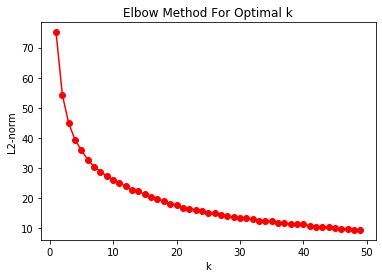

9.418208755686392

In [27]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 10 clusters.

In [28]:
# set number of clusters
kclusters = 5

In [29]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([3, 4, 4, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 3, 4, 1, 4, 1, 0, 0, 2,
       0, 4, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 4,
       2, 2, 2, 1, 1, 0, 4, 1, 1, 0, 4, 1, 4, 0, 1, 1, 2, 1, 0, 1, 4, 2,
       1, 4, 3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 4, 1, 3, 0, 3, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 3, 4, 1, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 2, 1,
       4, 1, 1, 0, 2, 3, 1, 0, 1, 2, 1, 2, 4, 0, 4, 4, 2, 1, 1, 1, 4, 2,
       1, 3, 3, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 4, 1, 0, 1, 1, 0, 1, 4,
       0, 4, 1, 4, 0, 0, 2, 2, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 4, 1, 0, 4, 1, 4, 1, 1, 0, 1, 2, 1, 3, 1, 2, 0,
       1, 1, 0, 3, 0, 4, 3, 0, 0, 0, 4, 4, 0, 0, 2, 1, 0, 1, 3, 1, 4, 2,
       2, 3, 1, 0, 4, 2, 1, 1, 1, 4, 1, 0, 1, 0, 4, 1, 2, 4, 1, 0, 1, 2,
       3, 3, 4, 1, 4, 4, 0, 1, 0, 1, 4, 3, 2, 1, 1, 0, 0, 0, 0, 0, 4, 2,
       4, 3, 0, 4, 1, 2, 0, 0, 0, 0, 1, 1, 1, 3, 4, 0, 1, 0, 3, 1, 2, 0,
       0, 2, 0, 1, 0, 4, 4, 3, 1, 0, 1, 4, 2, 0, 1,

In [30]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [31]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N05=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N05=kclusters_N05.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [32]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighbourhoods.loc[neighbourhoods.Neighbourhood.isin(neighbourhoods_venues_sorted.Neighbourhood.values)]
# merge London_neig_grouped with to add latitude/longitude for each Neighbourhood
London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
277,Haringey,Tottenham Hale,51.588333,-0.059722,0,food,shops,parks_outdoors,nightlife,travel
113,Bromley,Widmore (also Widmore Green),51.402396,0.035160,0,food,nightlife,shops,parks_outdoors,building
114,Bromley,Southborough,51.389915,0.044618,0,shops,nightlife,food,arts_entertainment,travel
115,Bromley,St Paul's Cray,51.399800,0.106700,0,shops,food,travel,parks_outdoors,nightlife
414,Lewisham,Brockley,51.452900,-0.034500,0,food,shops,travel,nightlife,arts_entertainment


Finally, let's visualize the resulting clusters

In [33]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [34]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
 
colors=get_colors(kclusters)
         
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.3).add_to(map_clusters)
       
map_clusters


In [35]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_neig_clusters_CATEGORY05.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [36]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [37]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
277,Haringey,Tottenham Hale,51.588333,-0.059722,0,food,shops,parks_outdoors,nightlife,travel
113,Bromley,Widmore (also Widmore Green),51.402396,0.035160,0,food,nightlife,shops,parks_outdoors,building
114,Bromley,Southborough,51.389915,0.044618,0,shops,nightlife,food,arts_entertainment,travel
115,Bromley,St Paul's Cray,51.399800,0.106700,0,shops,food,travel,parks_outdoors,nightlife
414,Lewisham,Brockley,51.452900,-0.034500,0,food,shops,travel,nightlife,arts_entertainment
...,...,...,...,...,...,...,...,...,...,...
467,Richmond upon Thames,Barnes,51.474000,-0.236000,0,food,arts_entertainment,parks_outdoors,shops,nightlife
541,Westminster,Knightsbridge,51.501700,-0.162100,0,food,shops,travel,nightlife,parks_outdoors
37,Barnet,Osidge,51.634500,-0.142300,0,shops,parks_outdoors,nightlife,food,travel
512,Tower Hamlets,Limehouse,51.515800,-0.031800,0,food,parks_outdoors,arts_entertainment,shops,travel


In [38]:
 print ('CLuster 2: ')

CLuster 2: 


In [39]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
294,Harrow,South Harrow,51.564000,-0.352410,1,food,shops,parks_outdoors,nightlife,travel
540,Westminster,Soho,51.512778,-0.131111,1,food,arts_entertainment,shops,nightlife,parks_outdoors
297,Harrow,Belmont,51.601225,-0.318101,1,food,shops,nightlife,travel,parks_outdoors
291,Harrow,Harrow Weald,51.604000,-0.339000,1,food,shops,travel,parks_outdoors,nightlife
298,Sutton,Belmont,51.601225,-0.318101,1,food,shops,nightlife,travel,parks_outdoors
...,...,...,...,...,...,...,...,...,...,...
215,Enfield,Palmers Green,51.617800,-0.109200,1,food,shops,nightlife,travel,parks_outdoors
39,Barnet,Oakleigh Park,51.626000,-0.171600,1,food,parks_outdoors,nightlife,travel,shops
216,Enfield,Freezywater,51.678300,-0.031000,1,food,shops,travel,parks_outdoors,nightlife
38,Barnet,The Hale,51.620000,-0.260000,1,food,shops,travel,parks_outdoors,nightlife


In [40]:
print ('Cluster 3: ')

Cluster 3: 


In [41]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
124,Hillingdon,Hayes,51.377784,0.010300,2,shops,travel,food,parks_outdoors,nightlife
123,Bromley,Hayes,51.377784,0.010300,2,shops,travel,food,parks_outdoors,nightlife
411,Lewisham,Bellingham,51.431100,-0.024500,2,shops,travel,parks_outdoors,building,nightlife
131,Bromley,Chelsfield,51.358155,0.127800,2,shops,nightlife,travel,parks_outdoors,food
122,Bromley,St Mary Cray,51.392000,0.108000,2,shops,food,travel,parks_outdoors,nightlife
...,...,...,...,...,...,...,...,...,...,...
295,Harrow,West Harrow,51.579710,-0.353380,2,shops,travel,parks_outdoors,food,nightlife
235,Lewisham,Horn Park,51.447000,0.026000,2,shops,food,arts_entertainment,travel,parks_outdoors
377,Kingston upon Thames,Malden Rushett,51.336769,-0.320285,2,shops,nightlife,travel,parks_outdoors,food
255,Hackney,Hackney Marshes,51.557000,-0.030000,2,shops,parks_outdoors,arts_entertainment,travel,nightlife


In [42]:
print('Cluster 4: ')

Cluster 4: 


In [43]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
47,Barnet,Barnet Gate,51.641827,-0.242985,3,parks_outdoors,nightlife,arts_entertainment,travel,shops
445,Waltham Forest,Snaresbrook,51.587027,0.014563,3,shops,parks_outdoors,travel,nightlife,food
444,Redbridge,Snaresbrook,51.587027,0.014563,3,shops,parks_outdoors,travel,nightlife,food
443,Redbridge,Loxford,51.548070,0.081840,3,parks_outdoors,shops,travel,nightlife,food
209,Enfield,Bulls Cross,51.678150,-0.059325,3,parks_outdoors,nightlife,arts_entertainment,travel,shops
48,Barnet,Whetstone,51.626000,-0.171500,3,parks_outdoors,food,nightlife,travel,shops
180,Croydon,Woodside,51.387077,-0.065331,3,parks_outdoors,travel,food,shops,nightlife
211,Enfield,Crews Hill,51.678000,-0.097000,3,parks_outdoors,shops,arts_entertainment,travel,nightlife
459,Richmond upon Thames,Kew,51.483700,-0.278000,3,parks_outdoors,nightlife,food,arts_entertainment,travel
201,Ealing,Hanwell,51.518900,-0.337600,3,shops,parks_outdoors,travel,nightlife,food


In [44]:
print('Cluster 5:')

Cluster 5:


In [45]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
490,Southwark,East Dulwich,51.462000,-0.084000,4,food,travel,shops,parks_outdoors,nightlife
188,Croydon,Riddlesdown,51.331300,-0.095700,4,travel,food,shops,parks_outdoors,nightlife
200,Hammersmith and Fulham,Acton,51.513519,-0.270661,4,travel,shops,food,parks_outdoors,nightlife
492,Southwark,Peckham,51.471400,-0.062500,4,food,nightlife,travel,shops,arts_entertainment
301,Havering,Wennington,51.506100,0.218900,4,travel,shops,parks_outdoors,nightlife,food
...,...,...,...,...,...,...,...,...,...,...
176,Croydon,Kenley,51.324200,-0.096900,4,travel,shops,nightlife,parks_outdoors,food
101,Ealing,Park Royal,51.529088,-0.281267,4,food,arts_entertainment,travel,building,shops
433,Newham,Custom House,51.507600,0.029700,4,food,travel,parks_outdoors,nightlife,arts_entertainment
461,Richmond upon Thames,Hampton Wick,51.415000,-0.310000,4,food,travel,nightlife,shops,parks_outdoors


In [46]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N05=np.empty([kclusters,2])                                         
Centroids_N05=pd.DataFrame(Centroids_N05, columns=['x-Latitude','y-Longitude']) 
Centroids_N05['x-Latitude']=x
Centroids_N05['y-Longitude']=y
Centroids_N05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N05.xlsx')

In [47]:
Centroids_N05

,x-Latitude,y-Longitude
0,51.511954,-0.086510
1,51.519644,-0.139601
2,51.467130,-0.028380
3,51.501375,-0.072563
4,51.491356,-0.120649


In [48]:
features=London_neig_grouped_clustering.columns.tolist()

In [49]:
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0

In [50]:
score

,0,1,2,3,4
arts_entertainment,1,0,0,2,0
building,0,0,0,0,1
education,0,0,0,0,0
event,0,0,0,0,0
food,56,223,0,0,43
nightlife,0,1,0,1,17
parks_outdoors,2,0,0,31,5
shops,54,0,65,9,1
travel,0,0,3,2,39


In [51]:
p_score=score.max().sum()/score.sum().sum()

In [52]:
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N05=kclusters_N05.append(p_score)

In [53]:
kclusters_N05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N05.xlsx')
kclusters_N05

0    108.000000
1    206.000000
2     64.000000
3     41.000000
4     96.000000
5      0.202304
6      0.751799
dtype: float64